<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/MP/blob/main/Gold_1st_type_dataset_3DTensor_CNN_2_layers_epoch50_patience5_5_minute_High%26LwPrices_2021_10_%D0%BE%D1%82%D0%BB%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3D-Tensor (NoGenerator) 
## CNN with metrics 2021      
### Predictions of High & Low prices together
### High & low prices during Five(5) next minutes
- Early-Stopping
- MSE - main

### length of analysed history - 50 minutes ago
#### two experiments:
- mse. mae, mape,
- mse only
#### test
- 355.590 rows


In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn

from sklearn.preprocessing import MinMaxScaler

In [77]:
import tensorflow as tf
from tensorflow import keras

In [78]:
print(tf.__version__)

2.12.0


In [79]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [80]:
np.random.seed(19)

### Data

In [81]:
data = pd.read_csv('GOLD_2021_normilised_1st-type-set.csv', low_memory=False, sep=',')

In [82]:
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid_1,Y_Low_Ask_1
0,0.811049,0.831454,0.805135,0.827373,0.040816,0.058665,0.702905,0.018909,0.946773,0.966270,0.838370,0.875414,1,1,0.831454,0.808331
1,0.827408,0.827408,0.819004,0.823569,0.036934,0.024892,0.681059,0.012758,0.843439,0.779879,0.793527,0.836420,0,0,0.827408,0.822995
2,0.823258,0.829760,0.822739,0.829172,0.045068,0.014744,0.667698,0.032125,0.838370,0.869565,0.813024,0.840320,0,0,0.829760,0.826384
3,0.829241,0.830555,0.827684,0.829068,0.039193,0.007258,0.666522,0.033831,0.844219,0.910509,0.873465,0.831741,0,0,0.830555,0.830258
4,0.829033,0.830036,0.820719,0.824371,0.062640,0.014635,0.654777,0.050855,0.829791,0.886333,0.831741,0.908949,0,0,0.830036,0.824032


In [83]:
data.tail()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid_1,Y_Low_Ask_1
354638,0.546752,0.547720,0.546406,0.547374,0.002632,0.003224,0.690293,0.000627,0.907779,0.908559,0.970170,0.903880,0,0,0.547720,0.547264
354639,0.547361,0.547706,0.546890,0.547443,0.001743,0.001495,0.689679,0.000263,0.903100,0.899980,0.889062,0.900760,0,0,0.547706,0.549187
354640,0.547409,0.547810,0.547374,0.547513,0.001094,0.000876,0.689701,0.000231,0.898811,0.921427,0.923377,0.931176,0,0,0.547810,0.549062
354641,0.547443,0.548758,0.546669,0.548481,0.002169,0.003594,0.690902,0.001510,0.927276,0.923377,0.971339,0.907779,0,0,0.548758,0.547506
354642,0.548861,0.549069,0.547686,0.548412,0.002239,0.003419,0.690723,0.001251,0.929226,0.863716,0.883213,0.844219,0,0,0.549069,0.550086


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354643 entries, 0 to 354642
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          354643 non-null  float64
 1   High_Bid          354643 non-null  float64
 2   Low_Bid           354643 non-null  float64
 3   Close_Bid         354643 non-null  float64
 4   Volume_Bid        354643 non-null  float64
 5   Volume_Ask        354643 non-null  float64
 6   Volume_Delta      354643 non-null  float64
 7   Volume_Delta_abs  354643 non-null  float64
 8   Open_Delta        354643 non-null  float64
 9   High_Delta        354643 non-null  float64
 10  Low_Delta         354643 non-null  float64
 11  Close_Delta       354643 non-null  float64
 12  New_day           354643 non-null  int64  
 13  New_week          354643 non-null  int64  
 14  Y_High_Bid_1      354643 non-null  float64
 15  Y_Low_Ask_1       354643 non-null  float64
dtypes: float64(14), int6

In [85]:
#downsising

data['Open_Bid']   = pd.to_numeric(data['Open_Bid'],downcast='float')
data['High_Bid']   = pd.to_numeric(data['High_Bid'],downcast='float')
data['Low_Bid']    = pd.to_numeric(data['Low_Bid'],downcast='float')
data['Close_Bid']  = pd.to_numeric(data['Close_Bid'],downcast='float')

data['Volume_Bid']       = pd.to_numeric(data['Volume_Bid'],downcast='float')
data['Volume_Ask']       = pd.to_numeric(data['Volume_Ask'],downcast='float')
data['Volume_Delta']     = pd.to_numeric(data['Volume_Delta'],downcast='float')
data['Volume_Delta_abs'] = pd.to_numeric(data['Volume_Delta_abs'],downcast='float')

data['Open_Delta']   = pd.to_numeric(data['Open_Delta'],downcast='float')
data['High_Delta']   = pd.to_numeric(data['High_Delta'],downcast='float')
data['Low_Delta']    = pd.to_numeric(data['Low_Delta'],downcast='float')
data['Close_Delta']  = pd.to_numeric(data['Close_Delta'],downcast='float')

data['Y_High_Bid_1']   = pd.to_numeric(data['Y_High_Bid_1'],downcast='float')
data['Y_Low_Ask_1']    = pd.to_numeric(data['Y_Low_Ask_1'],downcast='float')

In [86]:
data['New_day']  = pd.to_numeric(data['New_day'],downcast='integer')
data['New_week'] = pd.to_numeric(data['New_week'],downcast='integer')

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354643 entries, 0 to 354642
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          354643 non-null  float32
 1   High_Bid          354643 non-null  float32
 2   Low_Bid           354643 non-null  float32
 3   Close_Bid         354643 non-null  float32
 4   Volume_Bid        354643 non-null  float32
 5   Volume_Ask        354643 non-null  float32
 6   Volume_Delta      354643 non-null  float32
 7   Volume_Delta_abs  354643 non-null  float32
 8   Open_Delta        354643 non-null  float32
 9   High_Delta        354643 non-null  float32
 10  Low_Delta         354643 non-null  float32
 11  Close_Delta       354643 non-null  float32
 12  New_day           354643 non-null  int8   
 13  New_week          354643 non-null  int8   
 14  Y_High_Bid_1      354643 non-null  float32
 15  Y_Low_Ask_1       354643 non-null  float32
dtypes: float32(14), int8

In [88]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid_1,Y_Low_Ask_1
count,354643.000000,354643.000000,354643.000000,354643.000000,354643.000000,354643.000000,354643.000000,354643.000000,3.546430e+05,3.546430e+05,3.546430e+05,3.546430e+05,354643.000000,354643.000000,354643.000000,354643.000000
mean,0.445387,0.446257,0.444503,0.445383,0.012975,0.012759,0.689703,0.004101,9.489849e-01,9.491433e-01,9.492147e-01,9.487126e-01,0.000727,0.000147,0.446257,0.445732
std,0.169000,0.169004,0.168992,0.168999,0.011964,0.011177,0.005496,0.006834,1.455327e-02,1.351051e-02,1.410562e-02,1.389914e-02,0.026962,0.012108,0.169004,0.169010
min,0.022989,0.023864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.117023e-14,-3.117023e-14,1.316076e-14,1.316076e-14,0.000000,0.000000,0.023864,0.018067
25%,0.345873,0.346753,0.344937,0.345848,0.005049,0.005023,0.688241,0.000774,9.417040e-01,9.418990e-01,9.422889e-01,9.417040e-01,0.000000,0.000000,0.346753,0.346174
50%,0.425809,0.426639,0.425013,0.425809,0.009543,0.009473,0.689853,0.002252,9.495028e-01,9.495028e-01,9.495028e-01,9.495028e-01,0.000000,0.000000,0.426639,0.426203
75%,0.538521,0.539245,0.537794,0.538521,0.017250,0.016976,0.691351,0.005195,9.567167e-01,9.567167e-01,9.571066e-01,9.565217e-01,0.000000,0.000000,0.539245,0.539069
max,0.996517,0.998592,0.995999,0.996656,1.000000,0.463788,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,0.998592,0.997302


In [89]:
data.shape

(354643, 16)

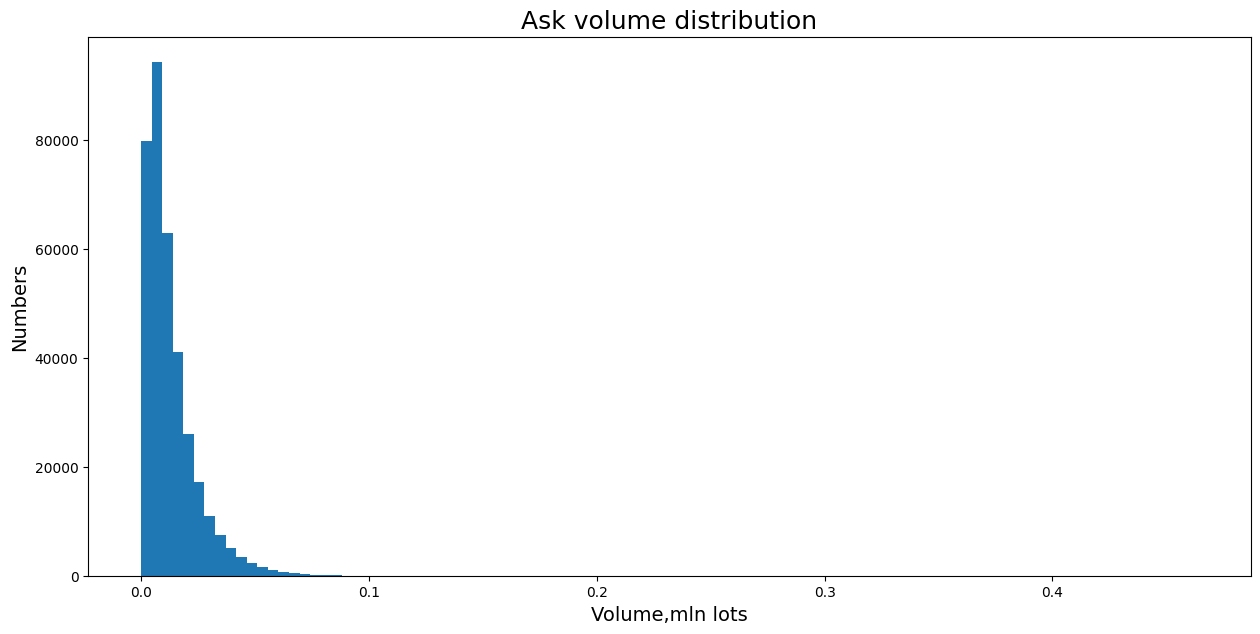

In [90]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Ask volume distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume,mln lots',size=14);

In [91]:
# !! here it is possible to take 2-Sigma or 3-Sigma

# in the code below, we remove 10% of lots by volume, which, however, make up the vast majority of trades.
# Those we consider only data outliers by volume

vol_Ask_90 = data[data['Volume_Ask'] > 0.1]       # More than 1 mln lots

vol_Ask_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 3757 to 316151
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open_Bid          34 non-null     float32
 1   High_Bid          34 non-null     float32
 2   Low_Bid           34 non-null     float32
 3   Close_Bid         34 non-null     float32
 4   Volume_Bid        34 non-null     float32
 5   Volume_Ask        34 non-null     float32
 6   Volume_Delta      34 non-null     float32
 7   Volume_Delta_abs  34 non-null     float32
 8   Open_Delta        34 non-null     float32
 9   High_Delta        34 non-null     float32
 10  Low_Delta         34 non-null     float32
 11  Close_Delta       34 non-null     float32
 12  New_day           34 non-null     int8   
 13  New_week          34 non-null     int8   
 14  Y_High_Bid_1      34 non-null     float32
 15  Y_Low_Ask_1       34 non-null     float32
dtypes: float32(14), int8(2)
memory usage: 2

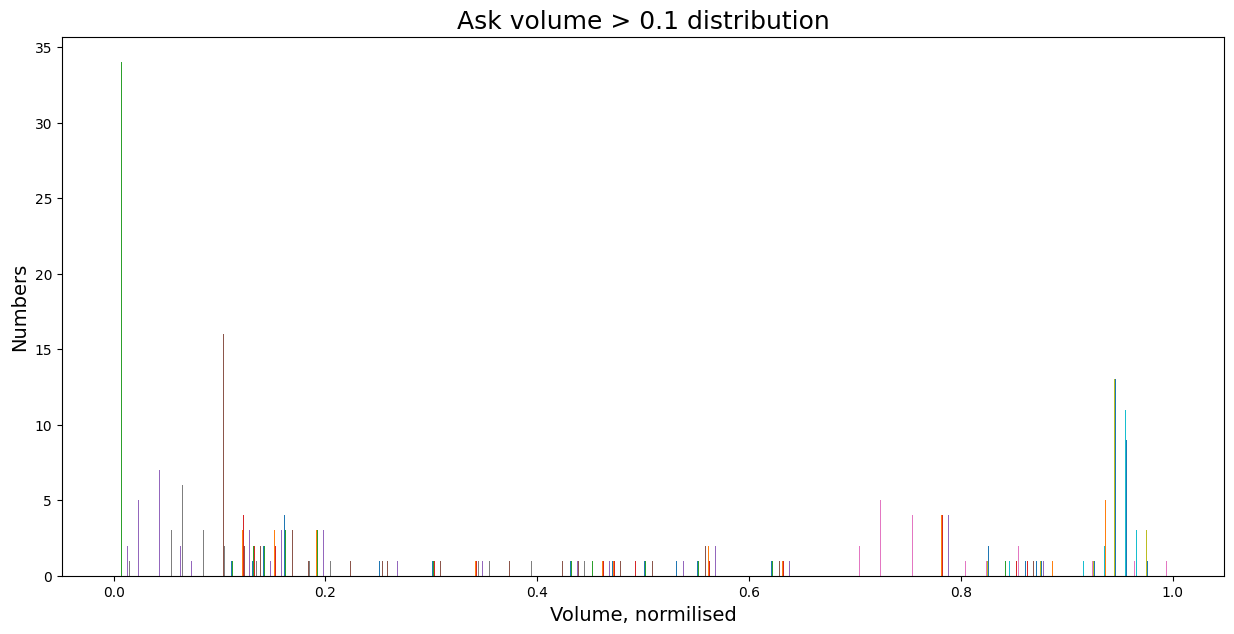

In [92]:
# 'Volume_Ask' > 0.1 - More than 10% from maximum number of lots

plt.figure(num=1, figsize=(15,7))

plt.hist(vol_Ask_90, bins=100)

plt.title('Ask volume > 0.1 distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume, normilised',size=14);

### Date transformation
to  3D numpy inputs tensor 
and 2D outputs vector

In [93]:
# we need a three-dimensional data tensor: [(n-N + 1), N, 13] and
# two-dimensional array of answers [(n-N + 1), 2] with the High and Low prices DURING next 5 minutes
# we shift prices sequentially from 1 to 5 minutes up.
# where N=50 is the number of minutes for analysis at each step those are looking backward 

# then you need to delete the 5 last sliced graphs (N*13), 
# since there is no prices for the next 5 minutes for it

# Therefore we need:
# three-dimensional data tensor of cliced graphs [(n - N + 1 - 5), N, 13] and
# two-dimensional array of answers Y[(n - N + 1 - 5), 2] with he High and Low prices shifted sequentially from 1 to 5 rows up.

In [94]:
# !!! We do not need to cut the number of rows because 
# we analase 1-minutes data and total number of rows is 355,590

In [95]:
n=data.shape[0]
p=data.shape[1]

In [96]:
print('Rows number is ',n)
print('Colonms number is ',p)

Rows number is  354643
Colonms number is  16


In [97]:
# create inputs Dataframe

data_ax = data.drop(['Y_High_Bid_1', 'Y_Low_Ask_1'],axis=1)

In [98]:
data_ax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354643 entries, 0 to 354642
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          354643 non-null  float32
 1   High_Bid          354643 non-null  float32
 2   Low_Bid           354643 non-null  float32
 3   Close_Bid         354643 non-null  float32
 4   Volume_Bid        354643 non-null  float32
 5   Volume_Ask        354643 non-null  float32
 6   Volume_Delta      354643 non-null  float32
 7   Volume_Delta_abs  354643 non-null  float32
 8   Open_Delta        354643 non-null  float32
 9   High_Delta        354643 non-null  float32
 10  Low_Delta         354643 non-null  float32
 11  Close_Delta       354643 non-null  float32
 12  New_day           354643 non-null  int8   
 13  New_week          354643 non-null  int8   
dtypes: float32(12), int8(2)
memory usage: 16.9 MB


In [99]:
data_ax.shape

(354643, 14)

# create outputs Dataframe

In [100]:
data_ay = data[['Y_High_Bid_1', 'Y_Low_Ask_1']]

In [101]:
data_ay.shape

(354643, 2)

In [102]:
data_ay.tail(10)

,Y_High_Bid_1,Y_Low_Ask_1
354633,0.546510,0.547333
354634,0.546164,0.547215
354635,0.546129,0.547284
354636,0.546337,0.547973
354637,0.546945,0.548025
354638,0.547720,0.547264
354639,0.547706,0.549187
354640,0.547810,0.549062
354641,0.548758,0.547506
354642,0.549069,0.550086


In [103]:
data_ay.head(6)

,Y_High_Bid_1,Y_Low_Ask_1
0,0.831454,0.808331
1,0.827408,0.822995
2,0.829760,0.826384
3,0.830555,0.830258
4,0.830036,0.824032
5,0.825782,0.823168


In [104]:
# shift by one minute(row) up
# we have to exclude the min and max prices of the current minute while further 
# finding the min and max prices DURING the next 5 minutes

data_ay = data_ay.shift(-1)

In [105]:
data_ay.tail(10)

,Y_High_Bid_1,Y_Low_Ask_1
354633,0.546164,0.547215
354634,0.546129,0.547284
354635,0.546337,0.547973
354636,0.546945,0.548025
354637,0.547720,0.547264
354638,0.547706,0.549187
354639,0.547810,0.549062
354640,0.548758,0.547506
354641,0.549069,0.550086
354642,NaN,NaN


In [106]:
data_ay.head(6)

,Y_High_Bid_1,Y_Low_Ask_1
0,0.827408,0.822995
1,0.829760,0.826384
2,0.830555,0.830258
3,0.830036,0.824032
4,0.825782,0.823168
5,0.825194,0.822649


# create new colomns: MIN_Lowest(Low_Ask) and MAX_Highest(High_Bid) prices of DURING NEXT 5 minutes

# forward looking window

In [107]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=5)

data_ay['Y_High_Bid_15'] = data_ay['Y_High_Bid_1'].rolling(window=indexer).max()
data_ay['Y_Low_Ask_15']  = data_ay['Y_Low_Ask_1'].rolling(window=indexer).min()

In [108]:
data_ay.tail(10)

,Y_High_Bid_1,Y_Low_Ask_1,Y_High_Bid_15,Y_Low_Ask_15
354633,0.546164,0.547215,0.547720,0.547215
354634,0.546129,0.547284,0.547720,0.547264
354635,0.546337,0.547973,0.547810,0.547264
354636,0.546945,0.548025,0.548758,0.547264
354637,0.547720,0.547264,0.549069,0.547264
354638,0.547706,0.549187,NaN,NaN
354639,0.547810,0.549062,NaN,NaN
354640,0.548758,0.547506,NaN,NaN
354641,0.549069,0.550086,NaN,NaN
354642,NaN,NaN,NaN,NaN


In [109]:
data_ay.head(6)

,Y_High_Bid_1,Y_Low_Ask_1,Y_High_Bid_15,Y_Low_Ask_15
0,0.827408,0.822995,0.830555,0.822995
1,0.829760,0.826384,0.830555,0.822649
2,0.830555,0.830258,0.830555,0.822649
3,0.830036,0.824032,0.830036,0.822649
4,0.825782,0.823168,0.825782,0.821611
5,0.825194,0.822649,0.825194,0.821611


# remove unused columns

In [110]:
data_ay = data_ay.drop(['Y_High_Bid_1', 'Y_Low_Ask_1'],axis=1)

In [111]:
data_ay.tail(6)

,Y_High_Bid_15,Y_Low_Ask_15
354637,0.549069,0.547264
354638,NaN,NaN
354639,NaN,NaN
354640,NaN,NaN
354641,NaN,NaN
354642,NaN,NaN


# delete the 5 last rows in data_ay (because answers are incorrect)

In [112]:
for i in range(5):
        data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)

In [113]:
data_ay.tail(6)

,Y_High_Bid_15,Y_Low_Ask_15
354632,0.546945,0.547215
354633,0.547720,0.547215
354634,0.547720,0.547264
354635,0.547810,0.547264
354636,0.548758,0.547264
354637,0.549069,0.547264


In [114]:
data_ax.tail(4)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week
354639,0.547360,0.547706,0.546890,0.547444,0.001743,0.001495,0.689679,0.000263,0.903100,0.899980,0.889062,0.900760,0,0
354640,0.547409,0.547810,0.547374,0.547513,0.001094,0.000876,0.689701,0.000231,0.898811,0.921427,0.923377,0.931176,0,0
354641,0.547444,0.548758,0.546669,0.548481,0.002169,0.003594,0.690902,0.001510,0.927276,0.923377,0.971339,0.907779,0,0
354642,0.548861,0.549069,0.547686,0.548412,0.002239,0.003419,0.690723,0.001251,0.929226,0.863716,0.883213,0.844219,0,0


In [115]:
# delete the last 5 rows in data_ax (because we don't know the price for next 5 minutes)

for i in range(5):
  data_ax.drop(data_ax.shape[0]-1, axis=0, inplace=True)
data_ax.tail(4)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week
354634,0.545783,0.546164,0.545472,0.545493,0.001858,0.003085,0.690757,0.001300,0.931956,0.910509,0.920257,0.917528,0,0
354635,0.545528,0.546129,0.545528,0.546129,0.001352,0.002407,0.690631,0.001117,0.919477,0.931176,0.919477,0.931176,0,0
354636,0.546268,0.546337,0.546164,0.546337,0.001078,0.000694,0.689580,0.000406,0.919477,0.923377,0.916553,0.923377,0,0
354637,0.546406,0.546945,0.546371,0.546752,0.001630,0.001789,0.689976,0.000168,0.927276,0.917528,0.925327,0.927276,0,0


In [116]:
# delete the last row in data_ay (because answers are NaN)

data_ay.drop(data_ay.shape[0]-1, axis=0, inplace=True)

In [117]:
data_ay.tail(4)

,Y_High_Bid_15,Y_Low_Ask_15
354633,0.547720,0.547215
354634,0.547720,0.547264
354635,0.547810,0.547264
354636,0.548758,0.547264


In [118]:
# Create inputs Numpy

#data_a = np.array(data_ax[:n]) 
data_a = np.array(data_ax) 

print("data_a:")
print(data_a[:2,:])  
print('\n')
print(data_a[-2:,:]) 

print("numpy size: = ", data_a.shape)
print("type: ", data_a.dtype) 

data_a:
[[0.81104916 0.8314542  0.80513513 0.8273732  0.04081619 0.05866501
  0.70290464 0.01890864 0.94677323 0.9662702  0.83837    0.8754143
  1.         1.        ]
 [0.8274078  0.8274078  0.8190037  0.8235689  0.03693429 0.02489179
  0.6810594  0.01275755 0.8434393  0.7798791  0.793527   0.83642036
  0.         0.        ]]


[[5.4626763e-01 5.4633677e-01 5.4616386e-01 5.4633677e-01 1.0779389e-03
  6.9437787e-04 6.8958002e-01 4.0633604e-04 9.1947746e-01 9.2337686e-01
  9.1655296e-01 9.2337686e-01 0.0000000e+00 0.0000000e+00]
 [5.4640597e-01 5.4694545e-01 5.4637134e-01 5.4675180e-01 1.6301346e-03
  1.7888496e-03 6.8997633e-01 1.6813906e-04 9.2727625e-01 9.1752779e-01
  9.2532659e-01 9.2727625e-01 0.0000000e+00 0.0000000e+00]]
numpy size: =  (354638, 14)
type:  float32


In [119]:
# Create outputs Numpy

data_y = np.array(data_ay) 

print("data_a:")
print(data_y[:3,:])  
print('\n')
print(data_y[-3:,:]) 

print("numpy size: = ", data_y.shape)
print("type: ", data_y.dtype) 

data_a:
[[0.83055502 0.82299477]
 [0.83055502 0.82264894]
 [0.83055502 0.82264894]]


[[0.54772019 0.54726362]
 [0.54781008 0.54726362]
 [0.54875773 0.54726362]]
numpy size: =  (354637, 2)
type:  float64


#### Create the 3D inputs tensor

In [120]:
# Progress bar

from tqdm import tqdm

In [121]:
N=50               # sliding window depth
L=n-N-4              # number of sliding window slices
t=data_a.shape[1]  # features number
print('Size of a three-dimensional inputs tensor: ',L-1,N,t)

Size of a three-dimensional inputs tensor:  354588 50 14


In [122]:
# create imputs zeros 3D tensors with 'float32'
data_b = np.zeros( (L-1, N, t), dtype= 'float32' ) 

In [123]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

Y = np.zeros((L-1, 2), dtype= 'float32') # We will predict two prices - normalised High_Bid and Low_Ask

In [124]:
# fill the imputs 3D tansor (data_b) 
# and the array of answers Y 

#print('L = n - N = ', n-N, L)
print('L = n - N - 4 = ', n-N-4, L)
for k in tqdm(range(L-1)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_y[k+N-1,0]   # normalised Y_High_Bid_1 - 1 minute future price
    Y[k,1] = data_y[k+N-1,1]   # normalised Y_Low_Ask_1 -  1 minute future price

print(k) # index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

L = n - N - 4 =  354589 354589


100%|██████████| 354588/354588 [00:02<00:00, 143479.53it/s]

354587
data_b: 
 [[[0.81104916 0.8314542  0.80513513 ... 0.8754143  1.         1.        ]
  [0.8274078  0.8274078  0.8190037  ... 0.83642036 0.         0.        ]
  [0.8232576  0.82975954 0.8227388  ... 0.84031975 0.         0.        ]
  ...
  [0.8408959  0.841138   0.83989984 ... 0.9235718  0.         0.        ]
  [0.83988255 0.8411276  0.8397442  ... 0.9196724  0.         0.        ]
  [0.8402284  0.8409028  0.83970964 ... 0.9196724  0.         0.        ]]

 [[0.8274078  0.8274078  0.8190037  ... 0.83642036 0.         0.        ]
  [0.8232576  0.82975954 0.8227388  ... 0.84031975 0.         0.        ]
  [0.8292408  0.830555   0.82768446 ... 0.8317411  0.         0.        ]
  ...
  [0.83988255 0.8411276  0.8397442  ... 0.9196724  0.         0.        ]
  [0.8402284  0.8409028  0.83970964 ... 0.9196724  0.         0.        ]
  [0.8397788  0.84003127 0.8395367  ... 0.94111913 0.         0.        ]]

 [[0.8232576  0.82975954 0.8227388  ... 0.84031975 0.         0.        ]
  [0.

In [125]:
# control of the correctness of filling the array Y 
# (should show the normalised prices High_Bid and Low_Ask - MAX and MIN during five next minutes(step) ahead)
# may not match

import random

pp = random.randint(50, L-1) # (any number before 355535) - just to look at the middle of data_b
print('random int = ', pp)

#pp = 89564 # (any number before 249945) - just to look at the middle of data_b

print('\t','data_b:', '\t\t\t','Y:')
print('Y_High_Bid_1 ','\t\t','Y_High_Bid_1')

for i in range(7):
    print(data_b[pp+i,N-1,1], '\t\t', Y[pp+i,0])


random int =  265174
	 data_b: 			 Y:
Y_High_Bid_1  		 Y_High_Bid_1
0.28871426 		 0.29033977
0.2890878 		 0.29033977
0.2888803 		 0.29075477
0.2893368 		 0.29126665
0.28971723 		 0.2917439
0.29033977 		 0.29261544
0.29033977 		 0.2929613


In [126]:
# Each rows of Y above must have prices of one minute to future (may not match)

In [127]:
data = []
data

[]

In [128]:
data_ax = []
data_ax

[]

In [129]:
data_ay = []
data_ay

[]

In [130]:
data_a = []
data_a

[]

In [131]:
data_y = []
data_y

[]

## Train Test Split
- ~90% for training and validation
- ~10% for testing

In [132]:
np.round((0.9*(L-1)),0)

319129.0

In [133]:
train_start=0
train_end=int(np.round(0.9*(L-1),-2))
print(L-1,train_end)

354588 319100


In [134]:
test_start = train_end + 1
test_end = L-1
print(test_start, test_end)

319101 354588


In [135]:
print('test size = ',test_end-train_end)

test size =  35488


In [136]:
# form X_train and X_test
# Divide data_b into two unequal parts: for training (X_train) and for test (X_test)

X_train = np.zeros( ( train_end, N, t) , dtype= 'float32')
X_test  = np.zeros( ( test_end-train_end, N, t) , dtype= 'float32')

for z in tqdm(range(test_end)):
    if z < train_end:
        X_train[z,:,:] = data_b[z,:,:]
    else:
        X_test[z-train_end,:,:]  = data_b[z,:,:]    


print("X_train: ", X_train.shape, '\n')
print("X_test:  ", X_test.shape, '\n')

100%|██████████| 354588/354588 [00:01<00:00, 314178.87it/s]

X_train:  (319100, 50, 14) 

X_test:   (35488, 50, 14) 



In [137]:
y_train = np.zeros( ( train_end, 2) , dtype= 'float32')
y_test  = np.zeros( ( test_end-train_end, 2) , dtype= 'float32')

print("y_train: ", y_train.shape, '\n')
print("y_test:  ", y_test.shape, '\n')

y_train:  (319100, 2) 

y_test:   (35488, 2) 



In [138]:
for z in tqdm(range(test_end)):
    if z < train_end:
        y_train[z,:] = Y[z,:]
    else:
        y_test[z-train_end,:]  = Y[z,:]    

print("y_train: ", y_train.shape, '\n')
print("y_test:  ", y_test.shape, '\n')

100%|██████████| 354588/354588 [00:00<00:00, 954857.57it/s]

y_train:  (319100, 2) 

y_test:   (35488, 2) 



#### Final control

In [139]:
# print X_train, y_train, X_test и y_test

print('Data for training:')
print("X_train:")
print("Type: ", X_train.dtype,  type(X_train), "; Size: ", X_train.shape)

print("\n","y_train:")
print("Type: ", y_train.dtype,  type(y_train), "; Size: ", y_train.shape)

print('Data for testing:')
print("\n","X_test:")
print("Type: ", X_test.dtype, type(X_test), "; Size: ", X_test.shape)

print("\n","y_test:")
print("Type: ", y_test.dtype,  type(y_test), "; Size: ", y_test.shape)

Data for training:
X_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (319100, 50, 14)

 y_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (319100, 2)
Data for testing:

 X_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (35488, 50, 14)

 y_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (35488, 2)


### Training

### CNN

In [140]:
model=keras.Sequential([
    
    keras.layers.Conv1D(50,9, padding='same', input_shape=(50,14), activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.MaxPooling1D(7),
    keras.layers.Conv1D(100,7, padding='same', activation=tf.nn.relu, kernel_initializer='normal'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(25, activation=tf.nn.relu, kernel_initializer="normal"),
    keras.layers.Dense(2)
    
])


In [141]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 50, 50)            6350      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 50)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 100)            35100     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 2)                

#### Callbacks

In [142]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [143]:
es = EarlyStopping(monitor='val_mse', mode='min', patience=10, verbose=1)

In [144]:
mc = ModelCheckpoint(
    'CNN_mse_2021_Batch20_Epoch50_Patience10_during-5-minute_HighLowPrices_history-50min-{epoch:02d}-{val_mse:.9f}_corrected.h5', 
                     monitor='val_mse', mode='min', save_best_only=True)


In [145]:
#model.compile(optimizer="adam",loss="mse",metrics=['mse', 'mae', 'mape', 'mase', 'cosine_similarity'])
model.compile(optimizer="adam",loss="mse",metrics=['mse','mae', 'mape'])

In [146]:
history = model.fit(X_train, y_train, batch_size=20, epochs=50,
                    validation_split=0.1, shuffle=True, 
                    verbose=1, callbacks=[es, mc])

Epoch 1/50
14360/14360 [==============================] - 72s 5ms/step - loss: 1.3382e-04 - mse: 1.3382e-04 - mae: 0.0045 - mape: 1.2945 - val_loss: 1.0669e-05 - val_mse: 1.0669e-05 - val_mae: 0.0022 - val_mape: 0.4365
Epoch 2/50
14360/14360 [==============================] - 69s 5ms/step - loss: 1.6868e-05 - mse: 1.6868e-05 - mae: 0.0029 - mape: 0.8443 - val_loss: 1.0023e-05 - val_mse: 1.0023e-05 - val_mae: 0.0021 - val_mape: 0.4179
Epoch 3/50
14360/14360 [==============================] - 70s 5ms/step - loss: 1.4883e-05 - mse: 1.4883e-05 - mae: 0.0027 - mape: 0.7902 - val_loss: 1.8810e-05 - val_mse: 1.8810e-05 - val_mae: 0.0036 - val_mape: 0.7032
Epoch 4/50
14360/14360 [==============================] - 70s 5ms/step - loss: 1.3838e-05 - mse: 1.3838e-05 - mae: 0.0026 - mape: 0.7610 - val_loss: 8.2856e-06 - val_mse: 8.2856e-06 - val_mae: 0.0020 - val_mape: 0.3949
Epoch 5/50
14360/14360 [==============================] - 70s 5ms/step - loss: 1.3135e-05 - mse: 1.3135e-05 - mae: 0.0025 - 

In [148]:
# load the saved best model
# It has to be chosen manually from the saved best models.

CNN_saved_best_model = keras.models.load_model(
    '/content/CNN_mse_2021_Batch20_Epoch50_Patience10_during-5-minute_HighLowPrices_history-50min-27-0.000006071_corrected.h5')

#### Test

In [149]:
# Evaluate the quality of network training on test data (which the network did NOT see)

scores = CNN_saved_best_model.evaluate(X_test, y_test, verbose=1)

# mse, mae, mape = model.evaluate(X_test, y_test, verbose=0)

1109/1109 [==============================] - 3s 2ms/step - loss: 4.5014e-06 - mse: 4.5014e-06 - mae: 0.0014 - mape: 0.3376


In [150]:
scores

[4.501384864852298e-06,
 4.501384864852298e-06,
 0.001378548564389348,
 0.3375844359397888]

##  <font color='red'>! There are GOOD MSE / MAE / MAPE value during next 5 minutes for 2021 with CNN </font>

In [151]:
print("Mean squared error (mse): %.9f " % (scores[1]))

Mean squared error (mse): 0.000004501 


In [152]:
print("Mean absolute error (mae): %.9f " % (scores[2]))

Mean absolute error (mae): 0.001378549 


In [153]:
#  ?? check it later is it a part or per cent

#print("Mean absolute percentage error (mape): %.3f %%" % (scores[3]*100))
print("Mean absolute percentage error (mape): %.3f %%" % scores[3])

Mean absolute percentage error (mape): 0.338 %


### Visualisation

In [154]:
plt.style.use('seaborn-darkgrid') 

<ipython-input-154-e922cac9a80f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


#### MSE graphs during training

Text(0.5, 0, 'Mean Squared Error')

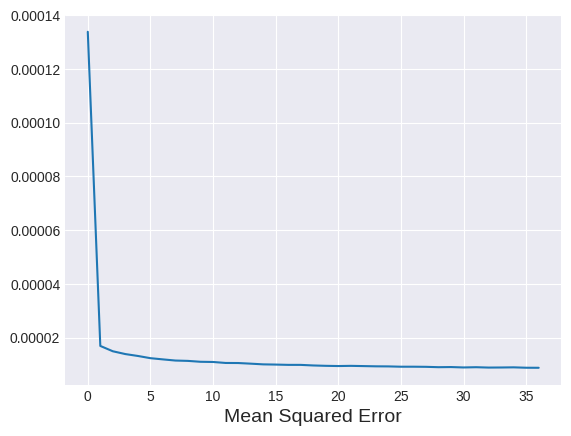

In [155]:
# Training Mean Squared Error (MSE)

pyplot.plot(history.history['mse'])
#pyplot.plot(history.history['mse'][1:])
plt.xlabel('Mean Squared Error',size=14)

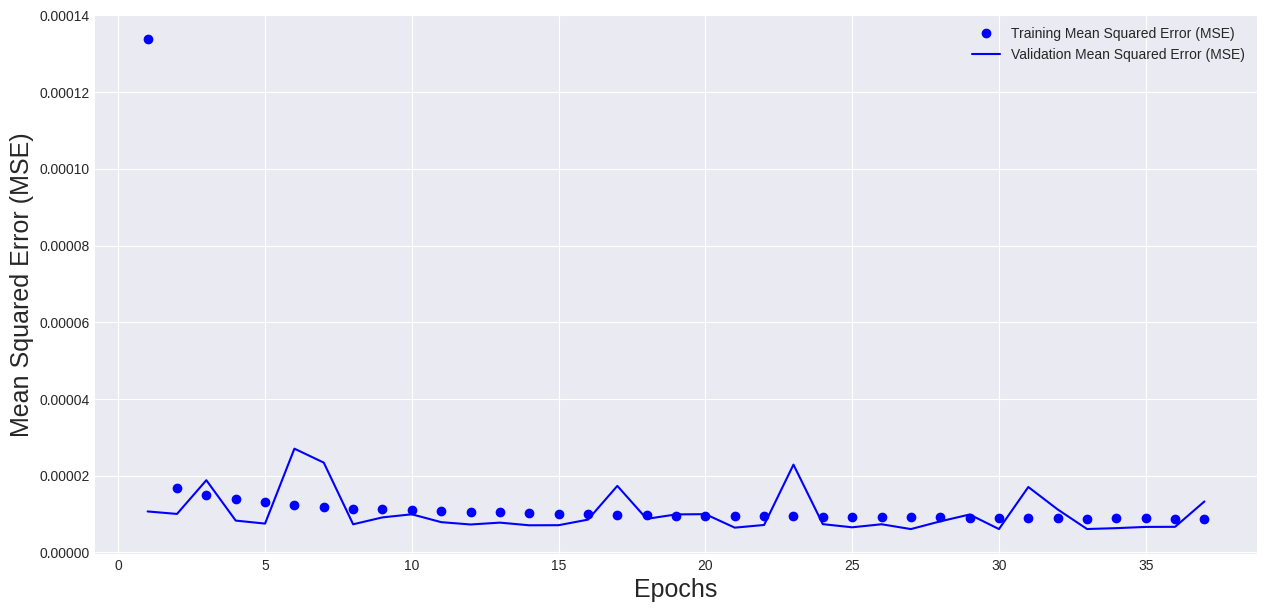

In [156]:
history_dict = history.history
#plt.style.use('seaborn-darkgrid') 
mse_values = history_dict['mse']

val_mse_values = history_dict['val_mse']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

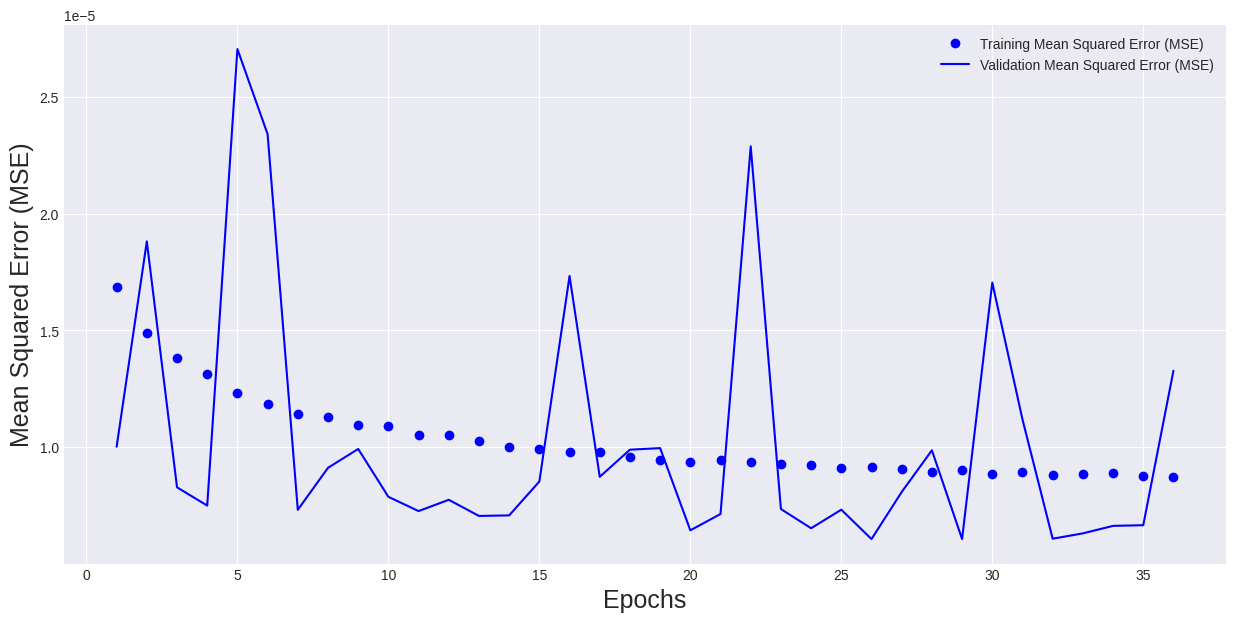

In [157]:
# deleted the 1st epoch

history_dict = history.history
#plt.style.use('seaborn-darkgrid') 
mse_values = history_dict['mse'][1:]

val_mse_values = history_dict['val_mse'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

#### MAE graphs during training

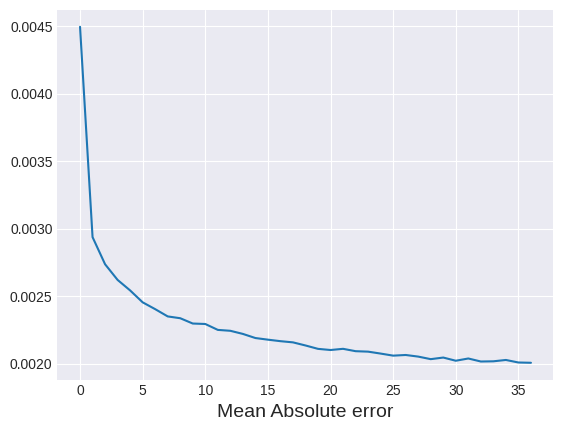

In [158]:
# Training Mean Absolute Error(MAE)

pyplot.plot(history.history['mae'])
plt.xlabel('Mean Absolute error',size=14)
pyplot.show()

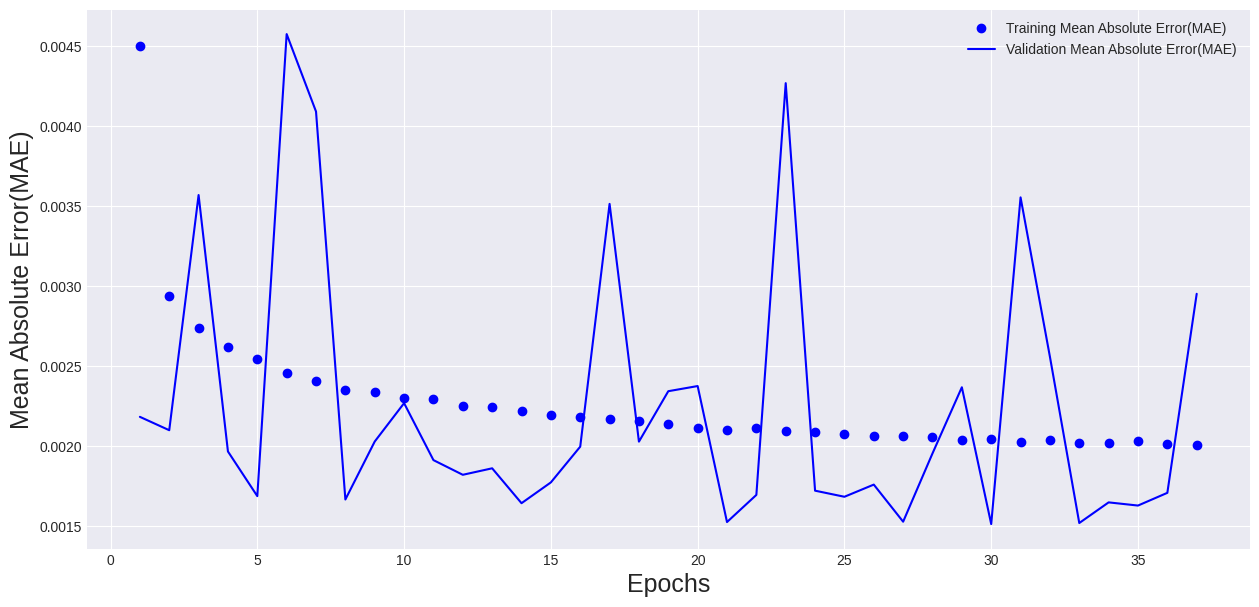

In [159]:
history_dict = history.history
#plt.style.use('seaborn-darkgrid') 
mae_values = history_dict['mae']

val_mae_values = history_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mae_values, 'bo', label='Training Mean Absolute Error(MAE)')
plt.plot(epochs, val_mae_values, 'b', label='Validation Mean Absolute Error(MAE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error(MAE)', size=18)
plt.legend()
plt.show()

#### Mean Absolute Percentage Error(MAPE) graphs during training

Text(0.5, 0, 'Mean Absoulte Percentage Error')

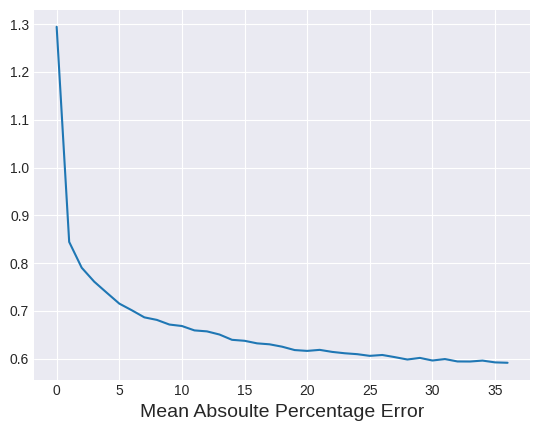

In [160]:
# Training Mean Absolute Percentage Error(MAPE)

pyplot.plot(history.history['mape'])
plt.xlabel('Mean Absoulte Percentage Error',size=14)

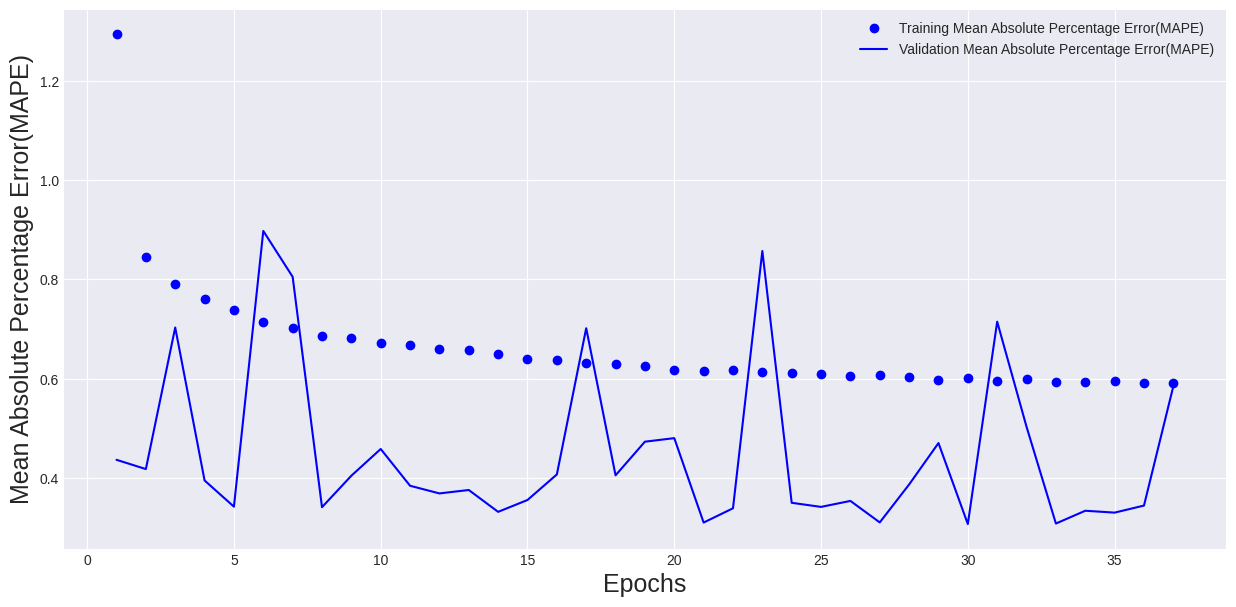

In [161]:
history_dict = history.history
#plt.style.use('seaborn-darkgrid') 
mape_values = history_dict['mape']

val_mape_values = history_dict['val_mape']

epochs = range(1, len(mape_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mape_values, 'bo', label='Training Mean Absolute Percentage Error(MAPE)')
plt.plot(epochs, val_mape_values, 'b', label='Validation Mean Absolute Percentage Error(MAPE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Percentage Error(MAPE)', size=18)
plt.legend()
plt.show()

### prediction 5 minute ahead

In [162]:
pred = CNN_saved_best_model(X_test)


In [163]:
print(pred)

tf.Tensor(
[[0.42066437 0.4181982 ]
 [0.42088562 0.4185494 ]
 [0.4213705  0.41894093]
 ...
 [0.5476537  0.54560435]
 [0.54764056 0.54569846]
 [0.5479124  0.54602593]], shape=(35488, 2), dtype=float32)


In [164]:
len(pred)

35488

### Normilised Price chart

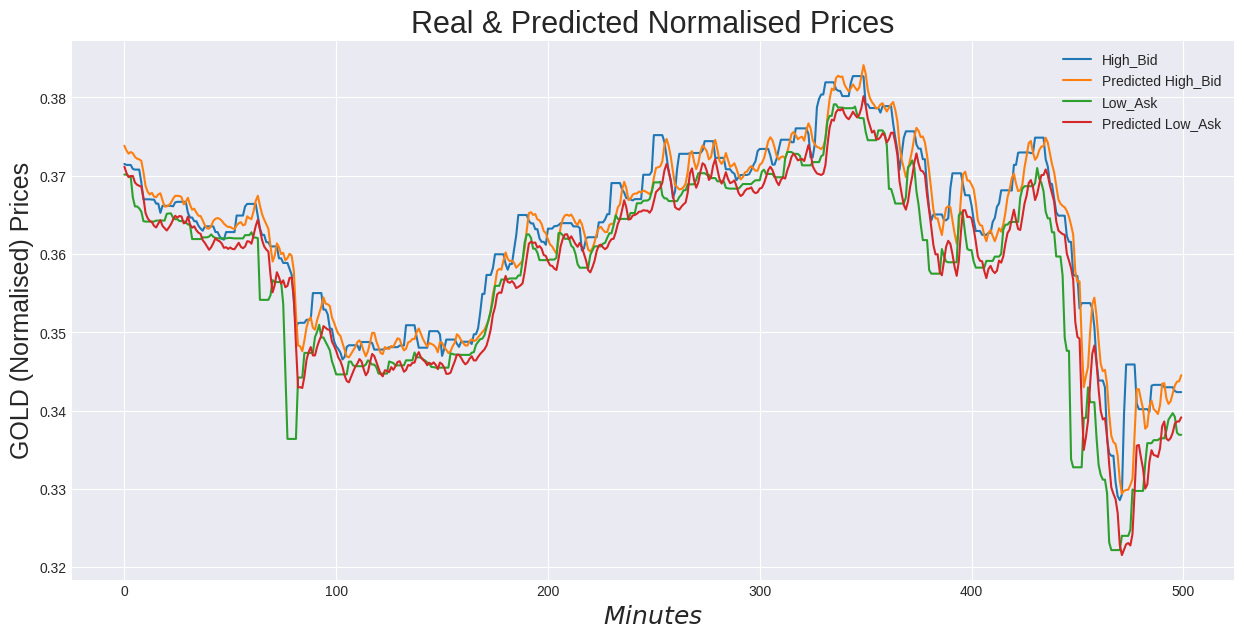

In [165]:
N1=7000  # the firt minute for the chart  
LL = 500  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart

#plt.style.use('seaborn-darkgrid') 
plt.ion()
#fig = plt.figure(figsize=(23,8))  
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Normalised Prices', size=22)
plt.ylabel('GOLD (Normalised) Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()


### Detailed normilised price chart

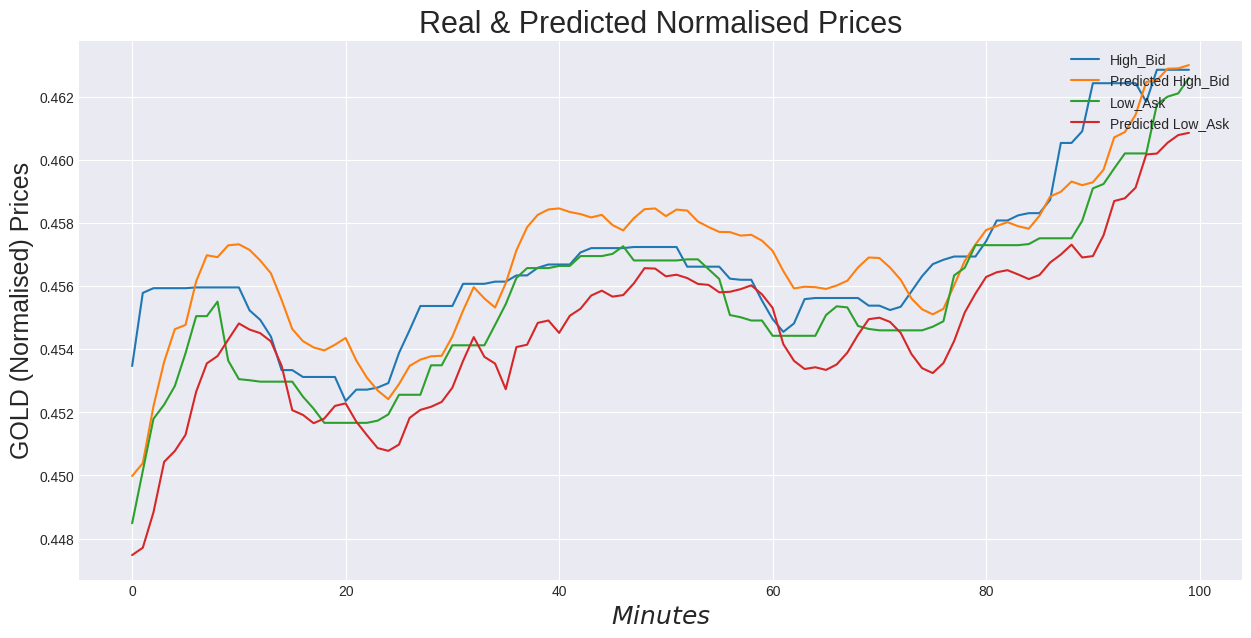

In [166]:
N1=27000  # the firt minute for the chart  
LL = 100  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

#plt.style.use('seaborn-darkgrid') 
plt.ion()
#fig = plt.figure(figsize=(23,8))  
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Normalised Prices', size=22)
plt.ylabel('GOLD (Normalised) Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()

### MSE only

In [169]:
es = EarlyStopping(monitor='val_mse', mode='min', patience=15, verbose=1)

In [170]:
mc = ModelCheckpoint(
    'CNN_mse-only_2021_Batch20_Epoch100_Patience15_during-5-minute_HighLowPrices_history-50min-{epoch:02d}-{val_mse:.9f}.h5', 
                     monitor='val_mse', mode='min', save_best_only=True)

In [171]:
model.compile(optimizer="adam",loss="mse",metrics='mse')

In [172]:
history_3 = model.fit(X_train, y_train, batch_size=20, epochs=100,
                    validation_split=0.1, shuffle=True, 
                    verbose=1, callbacks=[es, mc])

Epoch 1/100
14360/14360 [==============================] - 68s 5ms/step - loss: 8.6986e-06 - mse: 8.6986e-06 - val_loss: 1.4121e-05 - val_mse: 1.4121e-05
Epoch 2/100
14360/14360 [==============================] - 63s 4ms/step - loss: 8.6062e-06 - mse: 8.6062e-06 - val_loss: 7.5236e-06 - val_mse: 7.5236e-06
Epoch 3/100
14360/14360 [==============================] - 66s 5ms/step - loss: 8.5562e-06 - mse: 8.5562e-06 - val_loss: 1.9229e-05 - val_mse: 1.9229e-05
Epoch 4/100
14360/14360 [==============================] - 65s 4ms/step - loss: 8.6227e-06 - mse: 8.6227e-06 - val_loss: 8.4765e-06 - val_mse: 8.4765e-06
Epoch 5/100
14360/14360 [==============================] - 66s 5ms/step - loss: 8.5125e-06 - mse: 8.5125e-06 - val_loss: 6.7351e-06 - val_mse: 6.7351e-06
Epoch 6/100
14360/14360 [==============================] - 66s 5ms/step - loss: 8.4465e-06 - mse: 8.4465e-06 - val_loss: 7.4920e-06 - val_mse: 7.4920e-06
Epoch 7/100
14360/14360 [==============================] - 63s 4ms/step - lo

In [174]:
# load the saved best model
# It has to be chosen manually from the saved best models.

CNN_saved_best_model_2 = keras.models.load_model(
    '/content/CNN_mse-only_2021_Batch20_Epoch100_Patience15_during-5-minute_HighLowPrices_history-50min-34-0.000005715.h5')

In [175]:
# Evaluate the quality of network training on test data (which the network did NOT see)
scores_2 = CNN_saved_best_model_2.evaluate(X_test, y_test, verbose=0)

In [176]:
scores_2

[4.235800133756129e-06, 4.235800133756129e-06]

##  <font color='red'>! This is the BEST test MSE value for 5 minutesfor 2021 with CNN: </font>
###  <font color='red'>And the MSE is better than the best MSE with LSTM for 2020</font>

In [177]:
print("Mean squared error (mse): %.9f " % (scores_2[1]))

Mean squared error (mse): 0.000004236 


#### MSE graphs during training

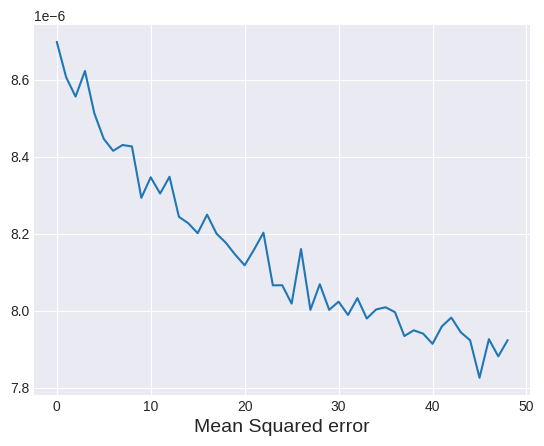

In [178]:
# Training Mean Absolute Error(MAE)

pyplot.plot(history_3.history['mse'])
plt.xlabel('Mean Squared error',size=14)
pyplot.show()

<ipython-input-179-d490c2536960>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


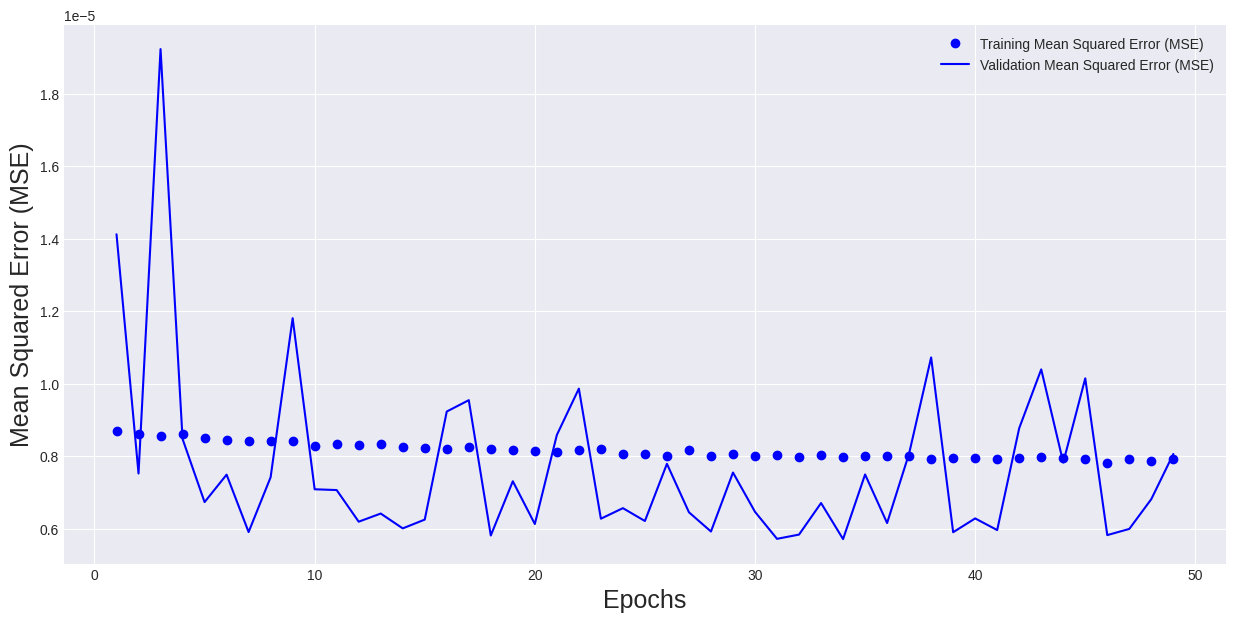

In [179]:
history_dict_3 = history_3.history
plt.style.use('seaborn-darkgrid') 
mse_values = history_dict_3['mse']

val_mse_values = history_dict_3['val_mse']

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

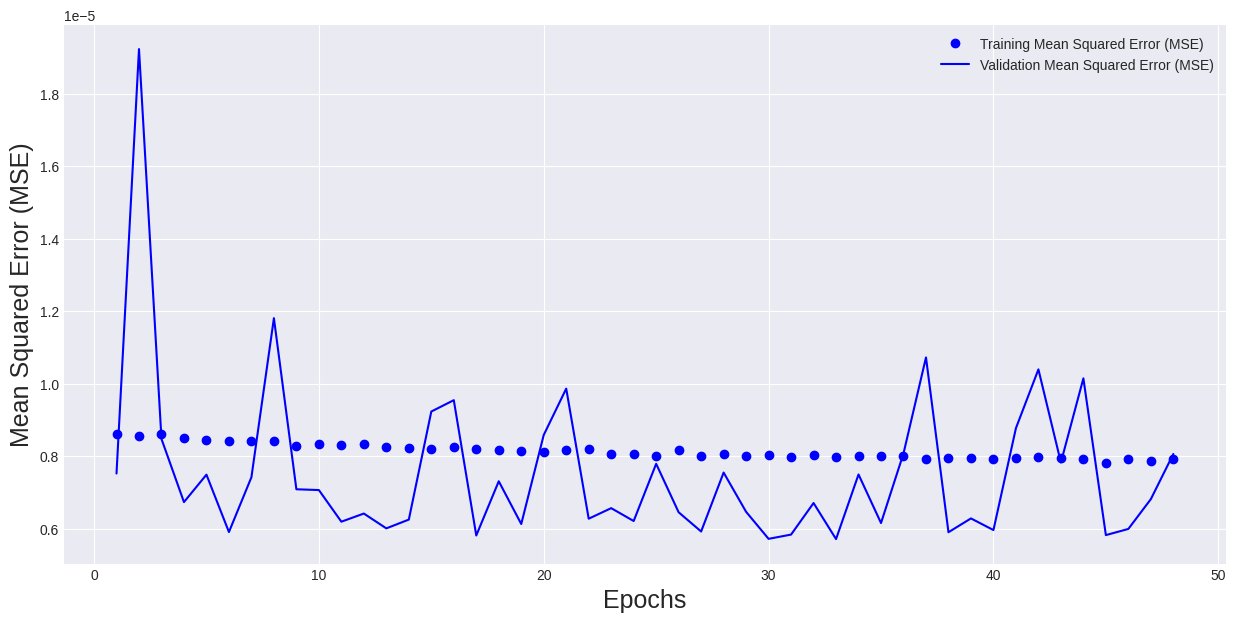

In [180]:
# deleted the 1st epoch

history_dict_3 = history_3.history
#plt.style.use('seaborn-darkgrid') 
mse_values = history_dict_3['mse'][1:]

val_mse_values = history_dict_3['val_mse'][1:]

epochs = range(1, len(mse_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mse_values, 'bo', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse_values, 'b', label='Validation Mean Squared Error (MSE)')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Squared Error (MSE)', size=18)
plt.legend()
plt.show()

In [181]:
pred = CNN_saved_best_model_2.predict(X_test)

1109/1109 [==============================] - 2s 2ms/step


In [182]:
print(pred)

[[0.42052314 0.4182969 ]
 [0.42071944 0.41864336]
 [0.42133927 0.41915205]
 ...
 [0.5477269  0.5455988 ]
 [0.54771864 0.5457    ]
 [0.54803926 0.54608834]]


In [183]:
len(pred)

35488

### Detailed normilised price chart

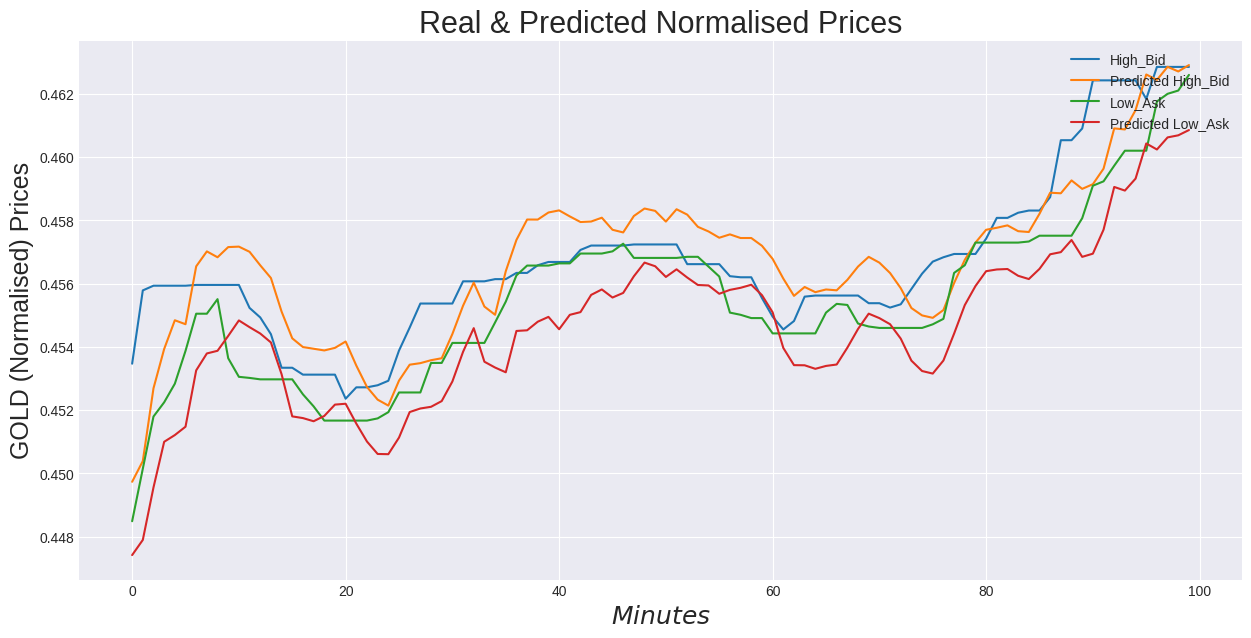

In [184]:
N1=27000  # the fifth minute for the chart  
LL = 100  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

#plt.style.use('seaborn-darkgrid') 
plt.ion()
#fig = plt.figure(figsize=(23,8))  
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[N1:N2,0], label='High_Bid')
line2, = ax1.plot(pred[N1:N2,0], label='Predicted High_Bid')
line3, = ax1.plot(y_test[N1:N2,1], label='Low_Ask')
line4, = ax1.plot(pred[N1:N2,1], label='Predicted Low_Ask')

plt.title('Real & Predicted Normalised Prices', size=22)
plt.ylabel('GOLD (Normalised) Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()